In [1]:
!pip install contractions 
!pip install string

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import contractions 
import string
import unicodedata

from bs4 import BeautifulSoup

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4') 
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords                     
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Avinash Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptro

In [6]:
df = pd.read_csv("Tweets.csv")
df.sample(3).T

,2358,7443,13934
tweet_id,569247182337019904,569603641767792641,569689239136423936
airline_sentiment,positive,positive,negative
airline_sentiment_confidence,1.0,1.0,1.0
negativereason,NaN,NaN,Cancelled Flight
negativereason_confidence,NaN,NaN,0.6661
airline,United,Delta,American
airline_sentiment_gold,NaN,NaN,NaN
name,smithnr,djchupy,BMichael319
negativereason_gold,NaN,NaN,NaN
retweet_count,0,0,0


In [7]:
print(df.duplicated().sum())
df= df.drop_duplicates()
print(df.duplicated().sum())

36
0


In [8]:
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14604, dtype: object

In [9]:
df_copy = df.copy()

### Remove `html` tags

In [10]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
df['text'] = df['text'].apply(lambda x:strip_html(x))
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14604, dtype: object

### Replace contractions in string 

In [11]:
def replace_contractions(text):
    '''
    Replace contractions in string of text    
    '''
    return contractions.fix(text)

df['text'] = df['text'].apply(lambda x:replace_contractions(x))
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 people so we need 2 kno...
Name: text, Length: 14604, dtype: object

### Remove numbers

In [12]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  people so we need  know ...
Name: text, Length: 14604, dtype: object

### Tokenization 

In [13]:
df['text'] = df.apply(lambda row: word_tokenize(row['text']), axis=1)
df['text'].sample(3)

8036    [@, JetBlue, heading, to, Buffalo, ..., tradin...
5817    [@, SouthwestAir, and, now, no, wifi, ?, ?, ?,...
6457    [@, SouthwestAir, Not, your, finest, moment, i...
Name: text, dtype: object

### Remove `Stopwords`

In [14]:
stopwords = stopwords.words('english')
retained_stopwords =['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = list(set(stopwords) - set(retained_stopwords))


### Lemmatization 

In [15]:
lemmatizer = WordNetLemmatizer()

def strip_html(text):
    """Remove HTML tags from a string and return clean text."""
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_numbers(text):
    """Remove numeric characters from a string."""
    return re.sub(r'\d+', '', text)

def tokenize(text):
    """Split a string into a list of words using spaces."""
    return text.split()

def remove_non_ascii(words):
    """Normalize and remove non-ASCII characters from a list of words."""
    return [unicodedata.normalize('NFKD', w).encode('ascii', 'ignore').decode('utf-8', 'ignore') for w in words]

def to_lowercase(words):
    """Convert all words in a list to lowercase."""
    return [w.lower() for w in words]

def remove_punctuation(words):
    """Remove punctuation from each word in a list."""
    return [re.sub(r'[^\w\s]', '', w) for w in words if re.sub(r'[^\w\s]', '', w) != '']

def remove_stopwords(words, stopwords):
    """Remove stopwords from a list of words."""
    return [w for w in words if w not in stopwords]

def lemmatize_list(words):
    """Lemmatize a list of words using verb as the part of speech."""
    return [lemmatizer.lemmatize(w, pos='v') for w in words]

def normalize(text):
    """
    Apply a series of preprocessing steps to clean and normalize text:
    - Remove HTML
    - Remove numbers
    - Tokenize
    - Remove non-ASCII characters
    - Convert to lowercase
    - Remove punctuation
    - Remove stopwords
    - Lemmatize
    Returns a single cleaned string.
    """
    text = strip_html(text)
    text = remove_numbers(text)
    words = tokenize(text)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words, stopwords)
    words = lemmatize_list(words)
    return ' '.join(words)

In [16]:
df = df_copy
df['text'] = df['text'].apply(normalize)
display(df['text'])

0                               virginamerica dhepburn say
1        virginamerica plus youve add commercials exper...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank get different flight chicago
14636    americanair leave minutes late flight warnings...
14637    americanair please bring american airlines bla...
14638    americanair money change flight dont answer ph...
14639    americanair ppl need know many seat next fligh...
Name: text, Length: 14604, dtype: object

### model based on `countvectorizer`

In [17]:
Count_vec = CountVectorizer(max_features=5000) 
data_features = Count_vec.fit_transform(df['text'])

data_features_array = data_features.toarray()
print(data_features_array.shape)
X = data_features
y = df.airline_sentiment


(14604, 5000)


### - `Baseline Model`

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [52]:
base_model = LogisticRegression()
base_model = base_model.fit(X_train, y_train)
print(np.mean(cross_val_score(base_model, X, y, cv=5)))
print(base_model.score(X_test, y_test))

0.6262666894899007
0.6344135098128708


In [53]:
y_pred = base_model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.6344135098128708
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.78      2796
           1       0.32      0.04      0.06       885
           2       0.00      0.00      0.00       701

    accuracy                           0.63      4382
   macro avg       0.32      0.34      0.28      4382
weighted avg       0.47      0.63      0.51      4382

🧮 Confusion Matrix:
 [[2748   47    1]
 [ 853   32    0]
 [ 680   21    0]]


- `'Alterations for count vectoriser'

In [54]:
Count_vec = CountVectorizer(max_features=10000) 
data_features = Count_vec.fit_transform(df['text'])

data_features_array = data_features.toarray()
print(data_features_array.shape)
X = data_features
y = df.airline_sentiment

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

base_model = LogisticRegression()
base_model = base_model.fit(X_train, y_train)
print(np.mean(cross_val_score(base_model, X, y, cv=5)))
print(base_model.score(X_test, y_test))

(14604, 10000)
0.7308282020137595
0.7964399817434962


In [55]:
y_pred = base_model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.7964399817434962
📋 Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.89      0.88      2796
     neutral       0.61      0.58      0.60       885
    positive       0.74      0.68      0.71       701

    accuracy                           0.80      4382
   macro avg       0.74      0.72      0.73      4382
weighted avg       0.79      0.80      0.79      4382

🧮 Confusion Matrix:
 [[2494  226   76]
 [ 280  516   89]
 [ 119  102  480]]


In [56]:
Count_vec = CountVectorizer(max_features=20000) 
data_features = Count_vec.fit_transform(df['text'])

data_features_array = data_features.toarray()
print(data_features_array.shape)
X = data_features
y = df.airline_sentiment

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

base_model = LogisticRegression()
base_model = base_model.fit(X_train, y_train)
print(np.mean(cross_val_score(base_model, X, y, cv=5)))
print(base_model.score(X_test, y_test))

(14604, 12683)
0.7303488203045495
0.7966681880419899


In [57]:
y_pred = base_model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.7966681880419899
📋 Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.89      0.88      2796
     neutral       0.61      0.58      0.60       885
    positive       0.75      0.68      0.71       701

    accuracy                           0.80      4382
   macro avg       0.74      0.72      0.73      4382
weighted avg       0.79      0.80      0.79      4382

🧮 Confusion Matrix:
 [[2494  226   76]
 [ 282  517   86]
 [ 121  100  480]]


In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
Count_vec = CountVectorizer(max_features=5000) 
data_features = Count_vec.fit_transform(df['text'])

data_features_array = data_features.toarray()
print(data_features_array.shape)
X = data_features
y = df.airline_sentiment

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
dtc.fit(X_train, y_train)
print(np.mean(cross_val_score(dtc, X, y, cv=5)))
print(dtc.score(X_test, y_test))

(14604, 5000)
0.6409205657660869
0.7060702875399361


In [59]:
y_pred = dtc.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.7060702875399361
📋 Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.81      0.81      2796
     neutral       0.45      0.46      0.46       885
    positive       0.60      0.59      0.59       701

    accuracy                           0.71      4382
   macro avg       0.62      0.62      0.62      4382
weighted avg       0.71      0.71      0.71      4382

🧮 Confusion Matrix:
 [[2272  366  158]
 [ 355  411  119]
 [ 159  131  411]]


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Vectorize text
Count_vec = CountVectorizer(max_features=5000)
data_features = Count_vec.fit_transform(df['text']).toarray()

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_features, y, test_size=0.3, random_state=42)

# Define model
model = Sequential([
    Dense(512, activation='relu', input_shape=(5000,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.6302 - loss: 0.8279 - val_accuracy: 0.7496 - val_loss: 0.5959
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8005 - loss: 0.4794 - val_accuracy: 0.7609 - val_loss: 0.5901
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9058 - loss: 0.2624 - val_accuracy: 0.7785 - val_loss: 0.6792
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9548 - loss: 0.1378 - val_accuracy: 0.7804 - val_loss: 0.8317
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9782 - loss: 0.0693 - val_accuracy: 0.7760 - val_loss: 1.0590
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9847 - loss: 0.0495 - val_accuracy: 0.7711 - val_loss: 1.1808
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9868 - loss: 0.0427 - val_accuracy: 0.7677 - val_loss: 1.2473
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9886 - loss: 0.0388 - val_accu

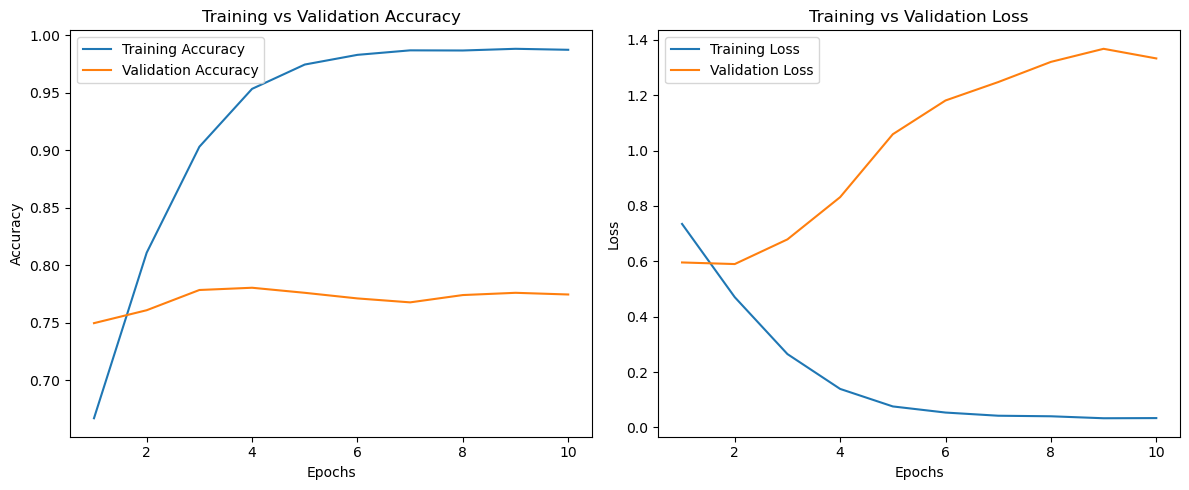

In [24]:
import matplotlib.pyplot as plt

def plot_history(history):
    """Plot training & validation accuracy and loss over epochs."""
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(5000,)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),

    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)


Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6263 - loss: 1.7145 - val_accuracy: 0.6406 - val_loss: 1.5998
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.7876 - loss: 1.2690 - val_accuracy: 0.6465 - val_loss: 1.5179
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8541 - loss: 1.1205 - val_accuracy: 0.7066 - val_loss: 1.5012
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9008 - loss: 0.9826 - val_accuracy: 0.7677 - val_loss: 1.3697
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9235 - loss: 0.9006 - val_accuracy: 0.7746 - val_loss: 1.3554
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9403 - loss: 0.8267 - val_accuracy: 0.7511 - val_loss: 1.4464
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9398 - loss: 0.7799 - val_accuracy: 0.7550 - val_loss: 1.4307
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9468 - loss: 0.7412 - val_acc

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Padding
max_len = 100  # You can tune this value based on text length distribution
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, BatchNormalization, Dense
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_len),

    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    BatchNormalization(),

    LSTM(32, return_sequences=True),
    Dropout(0.3),

    LSTM(32),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(len(le.classes_), activation='softmax')
])


In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 46s 258ms/step - accuracy: 0.6095 - loss: 0.9959 - val_accuracy: 0.6406 - val_loss: 1.0470
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 240ms/step - accuracy: 0.6186 - loss: 0.9611 - val_accuracy: 0.2020 - val_loss: 1.1321
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 32s 251ms/step - accuracy: 0.6139 - loss: 0.9594 - val_accuracy: 0.6406 - val_loss: 0.9198
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 32s 249ms/step - accuracy: 0.6222 - loss: 0.9458 - val_accuracy: 0.6406 - val_loss: 0.9208
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 33s 260ms/step - accuracy: 0.6131 - loss: 0.9505 - val_accuracy: 0.6406 - val_loss: 0.9135
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 28s 217ms/step - accuracy: 0.6147 - loss: 0.9457 - val_accuracy: 0.6406 - val_loss: 0.9136
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 32s 249ms/step - accuracy: 0.6132 - loss: 0.9438 - val_accuracy: 0.6406 - val_loss: 0.9130
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 244ms/step - accuracy: 0.6261 - loss: 0

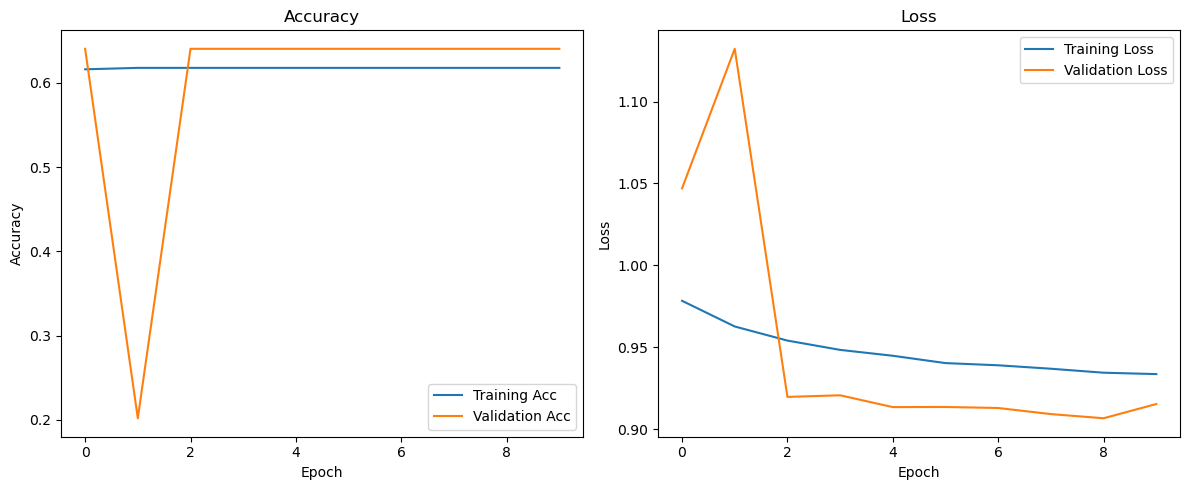

In [29]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Acc')
    plt.plot(history.history['val_accuracy'], label='Validation Acc')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ✂️ Preprocess Text
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

max_len = 100  # you can tune this based on your dataset
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# 🎯 Encode Labels
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

# 📚 Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🧠 Build Model
model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_len),

    LSTM(128, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    LSTM(64, return_sequences=True),
    Dropout(0.3),

    LSTM(64),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),

    Dense(len(le.classes_), activation='softmax')  # Final output
])

# 🧪 Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🚀 Train
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - accuracy: 0.5982 - loss: 0.9648 - val_accuracy: 0.6406 - val_loss: 0.9727
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 28s 218ms/step - accuracy: 0.6256 - loss: 0.9309 - val_accuracy: 0.6406 - val_loss: 0.9461
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 33s 256ms/step - accuracy: 0.6145 - loss: 0.9391 - val_accuracy: 0.6406 - val_loss: 0.9067
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 241ms/step - accuracy: 0.6124 - loss: 0.9411 - val_accuracy: 0.6406 - val_loss: 0.9017
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 34s 265ms/step - accuracy: 0.6118 - loss: 0.9389 - val_accuracy: 0.6406 - val_loss: 0.9002
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 30s 237ms/step - accuracy: 0.6123 - loss: 0.9401 - val_accuracy: 0.6406 - val_loss: 0.9019
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 245ms/step - accuracy: 0.6155 - loss: 0.9332 - val_accuracy: 0.6406 - val_loss: 0.9014
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 245ms/step - accuracy: 0.6138 - loss: 0

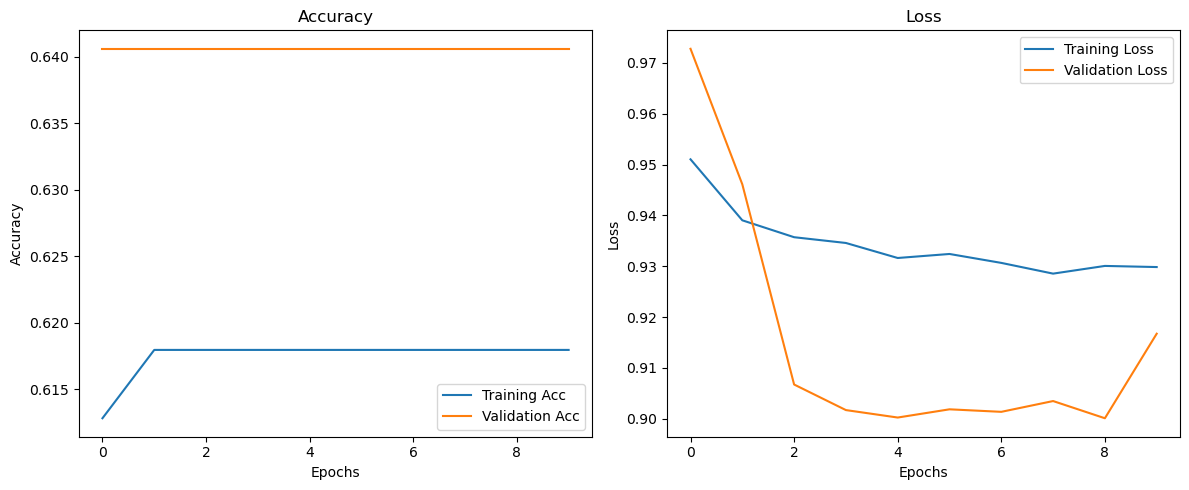

In [31]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Acc')
    plt.plot(history.history['val_accuracy'], label='Validation Acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [34]:
from sklearn.ensemble import RandomForestClassifier

Count_vec = CountVectorizer(max_features=5000) 
data_features = Count_vec.fit_transform(df['text'])

data_features_array = data_features.toarray()
print(data_features_array.shape)
X = data_features
y = df.airline_sentiment

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
nlp_rf = RandomForestClassifier(n_estimators=50, n_jobs=6)
nlp_rf = nlp_rf.fit(X_train, y_train)
print(np.mean(cross_val_score(nlp_rf, X, y, cv=5)))
print(nlp_rf.score(X_test, y_test))

(14604, 5000)
0.7110356511421778
0.772706526700137


In [35]:
import os

def setup_model_dir(directory='saved_models'):
    """Create a directory to store saved models."""
    if not os.path.exists(directory):
        os.makedirs(directory)
    return directory

model_dir = setup_model_dir()


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import joblib

def train_and_save_models(X_train, y_train, directory):
    """Train multiple models and save them."""
    models = {
        'decision_tree': DecisionTreeClassifier(),
        'logistic_regression': LogisticRegression(max_iter=1000),
        'naive_bayes': MultinomialNB()
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        joblib.dump(model, os.path.join(directory, f'{name}.pkl'))
    print(f"Models saved to '{directory}'")

train_and_save_models(X_train, y_train, model_dir)


Models saved to 'saved_models'


In [37]:
def load_model_and_predict(model_name, X_test, directory):
    """Load a saved model and predict on test data."""
    model_path = os.path.join(directory, f'{model_name}.pkl')
    model = joblib.load(model_path)
    predictions = model.predict(X_test)
    return predictions

# Example usage
dt_predictions = load_model_and_predict('decision_tree', X_test, model_dir)


In [38]:
dt_predictions,y_test)

array(['neutral', 'positive', 'negative', ..., 'negative', 'negative',
       'neutral'], dtype=object)

In [39]:
def save_keras_model(model, model_name, directory='saved_models'):
    """Save Keras model to disk in HDF5 format."""
    if not os.path.exists(directory):
        os.makedirs(directory)
    model.save(os.path.join(directory, f'{model_name}.h5'))
    print(f"Model '{model_name}' saved successfully.")



In [40]:
save_keras_model(model, 'lstm_model')


Model 'lstm_model' saved successfully.


In [41]:
from tensorflow.keras.models import load_model

def load_keras_model(model_name, directory='saved_models'):
    """Load a previously saved Keras model."""
    path = os.path.join(directory, f'{model_name}.h5')
    model = load_model(path)
    print(f"Model '{model_name}' loaded successfully.")
    return model


In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def predict_and_evaluate(model, X_test, y_test):
    """Run prediction using a loaded Keras model and evaluate accuracy."""
    y_pred_probs = model.predict(X_test)
    y_pred = y_pred_probs.argmax(axis=1)

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return y_pred


In [43]:
restored_model = load_keras_model('lstm_model')
predicted_labels = predict_and_evaluate(restored_model, X_test, y_test)


Model 'lstm_model' loaded successfully.


InvalidArgumentError: Graph execution error:

Detected at node sequential_3_1/SparseToDense defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "D:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "D:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "D:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "D:\Anaconda\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 641, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "D:\Anaconda\Lib\asyncio\events.py", line 88, in _run

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "D:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "D:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Avinash Mishra\AppData\Local\Temp\ipykernel_2608\4027516631.py", line 2, in <module>

  File "C:\Users\Avinash Mishra\AppData\Local\Temp\ipykernel_2608\1428764538.py", line 5, in predict_and_evaluate

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 560, in predict

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 259, in one_step_on_data_distributed

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 249, in one_step_on_data

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in predict_step

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 910, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 58, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\models\sequential.py", line 221, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 175, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 321, in _standardize_inputs

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 247, in _convert_inputs_to_tensors

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\core.py", line 958, in convert_to_tensor

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 128, in convert_to_tensor

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\sparse.py", line 20, in sparse_to_dense

indices[1] = [0,2623] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.


	 [[{{node sequential_3_1/SparseToDense}}]] [Op:__inference_one_step_on_data_distributed_112812]

In [44]:
# After fitting the model
save_keras_model(model, 'lstm_model')


Model 'lstm_model' saved successfully.


In [45]:
# Load previously saved model
dl_model = load_keras_model('lstm_model')


Model 'lstm_model' loaded successfully.


In [48]:
# Evaluate predictions
y_pred_probs = dl_model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


InvalidArgumentError: Graph execution error:

Detected at node sequential_3_1/SparseToDense defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "D:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "D:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "D:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "D:\Anaconda\Lib\asyncio\windows_events.py", line 322, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 641, in run_forever

  File "D:\Anaconda\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "D:\Anaconda\Lib\asyncio\events.py", line 88, in _run

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "D:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "D:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "D:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "D:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "D:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Avinash Mishra\AppData\Local\Temp\ipykernel_2608\561916784.py", line 2, in <module>

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 560, in predict

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 259, in one_step_on_data_distributed

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 249, in one_step_on_data

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in predict_step

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\layers\layer.py", line 910, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\operation.py", line 58, in __call__

  File "D:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "D:\Anaconda\Lib\site-packages\keras\src\models\sequential.py", line 221, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 175, in call

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 321, in _standardize_inputs

  File "D:\Anaconda\Lib\site-packages\keras\src\models\functional.py", line 247, in _convert_inputs_to_tensors

  File "D:\Anaconda\Lib\site-packages\keras\src\ops\core.py", line 958, in convert_to_tensor

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 128, in convert_to_tensor

  File "D:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\sparse.py", line 20, in sparse_to_dense

indices[1] = [0,2623] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.


	 [[{{node sequential_3_1/SparseToDense}}]] [Op:__inference_one_step_on_data_distributed_114306]

In [47]:
import numpy as np

# If X_test is sparse, convert it
if hasattr(X_test, "toarray"):
    X_test_dense = X_test.toarray()
else:
    X_test_dense = np.array(X_test)

y_pred_probs = dl_model.predict(X_test_dense)
y_pred = y_pred_probs.argmax(axis=1)


137/137 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.5857 - loss: 0.9770 - val_accuracy: 0.6406 - val_loss: 0.9889
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6076 - loss: 0.9521 - val_accuracy: 0.6406 - val_loss: 0.9697
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6168 - loss: 0.9367 - val_accuracy: 0.6406 - val_loss: 0.9054
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.6219 - loss: 0.9294 - val_accuracy: 0.6406 - val_loss: 0.9045
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.6100 - loss: 0.9436 - val_accuracy: 0.6406 - val_loss: 0.9005
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.6198 - loss: 0.9295 - val_accuracy: 0.6406 - val_loss: 0.9003
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.6263 - loss: 0.9200 - val_accuracy: 0.6406 - val_loss: 0.9064
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.6232 - loss: 0.9260 - val_accu

137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step
✅ Accuracy: 0.6380648105887723
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      2796
           1       0.00      0.00      0.00       885
           2       0.00      0.00      0.00       701

    accuracy                           0.64      4382
   macro avg       0.21      0.33      0.26      4382
weighted avg       0.41      0.64      0.50      4382

🧮 Confusion Matrix:
 [[2796    0    0]
 [ 885    0    0]
 [ 701    0    0]]


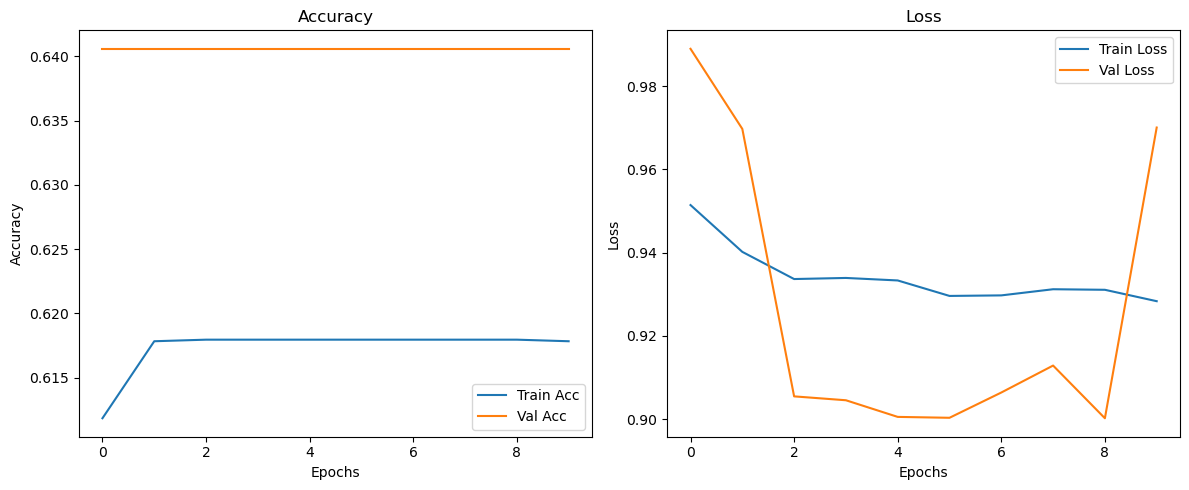

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ✨ Setup
def setup_model_dir(directory='saved_models'):
    if not os.path.exists(directory):
        os.makedirs(directory)
    return directory

model_dir = setup_model_dir()

# 📚 Preprocess Text
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
max_len = 500
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# 🎯 Encode Labels
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🧠 Build Model
def create_lstm_model(input_dim, output_dim, input_length, num_classes):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),

        LSTM(128, return_sequences=True),
        Dropout(0.3),
        BatchNormalization(),

        LSTM(64, return_sequences=True),
        Dropout(0.3),

        LSTM(64),
        BatchNormalization(),

        Dense(256, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),

        Dense(128, activation='relu'),
        Dropout(0.3),

        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),

        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_lstm_model(20000, 128, max_len, len(le.classes_))

# 🚀 Train and Save
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
model.save(os.path.join(model_dir, 'lstm_model.h5'))

# 🔁 Load and Predict
dl_model = load_model(os.path.join(model_dir, 'lstm_model.h5'))
y_pred_probs = dl_model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# 📊 Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📈 Plot History
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)


In [63]:
!pip install lightgbm xgboost


In [64]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import joblib

import lightgbm as lgb
import xgboost as xgb


In [65]:
# Bag-of-Words feature extraction
Count_vec = CountVectorizer(max_features=10000)
X = Count_vec.fit_transform(df['text'])
y = df['airline_sentiment']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Convert sparse matrix for boosting frameworks
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()


In [66]:
def setup_model_dir(directory='saved_models'):
    if not os.path.exists(directory):
        os.makedirs(directory)
    return directory

model_dir = setup_model_dir()

# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_dense, y_train)
joblib.dump(lgb_model, os.path.join(model_dir, 'lightgbm_model.pkl'))

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_dense, y_train)
joblib.dump(xgb_model, os.path.join(model_dir, 'xgboost_model.pkl'))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 10222, number of used features: 717
[LightGBM] [Info] Start training from score -0.474042
[LightGBM] [Info] Start training from score -1.533361
[LightGBM] [Info] Start training from score -1.821950


['saved_models\\xgboost_model.pkl']

In [67]:
def load_model_and_evaluate(model_path, X_test, y_test):
    model = joblib.load(model_path)
    y_pred = model.predict(X_test)

    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📋 Classification Report:\n", classification_report(y_test, y_pred))
    print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# LightGBM Results
print("🔦 LightGBM Model Results:")
load_model_and_evaluate(os.path.join(model_dir, 'lightgbm_model.pkl'), X_test_dense, y_test)

# XGBoost Results
print("\n🚀 XGBoost Model Results:")
load_model_and_evaluate(os.path.join(model_dir, 'xgboost_model.pkl'), X_test_dense, y_test)


🔦 LightGBM Model Results:
✅ Accuracy: 0.7959835691465085
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      2796
           1       0.62      0.57      0.59       885
           2       0.74      0.67      0.71       701

    accuracy                           0.80      4382
   macro avg       0.74      0.71      0.73      4382
weighted avg       0.79      0.80      0.79      4382

🧮 Confusion Matrix:
 [[2509  206   81]
 [ 298  506   81]
 [ 121  107  473]]

🚀 XGBoost Model Results:
✅ Accuracy: 0.7811501597444089
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2796
           1       0.62      0.45      0.52       885
           2       0.75      0.63      0.69       701

    accuracy                           0.78      4382
   macro avg       0.73      0.67      0.69      4382
weighted avg       0.77      0.78      0.77      43

In [68]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Preprocess
Count_vec = CountVectorizer(max_features=10000)
X = Count_vec.fit_transform(df['text'])
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.3, random_state=42)

# Train models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lgb_model = lgb.LGBMClassifier()

xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, 'saved_models/xgboost_model.pkl')
joblib.dump(lgb_model, 'saved_models/lightgbm_model.pkl')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 10222, number of used features: 717
[LightGBM] [Info] Start training from score -0.474042
[LightGBM] [Info] Start training from score -1.533361
[LightGBM] [Info] Start training from score -1.821950


['saved_models/lightgbm_model.pkl']

In [69]:
def evaluate_model(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

metrics = []
metrics.append(evaluate_model(xgb_model, "XGBoost", X_test, y_test))
metrics.append(evaluate_model(lgb_model, "LightGBM", X_test, y_test))


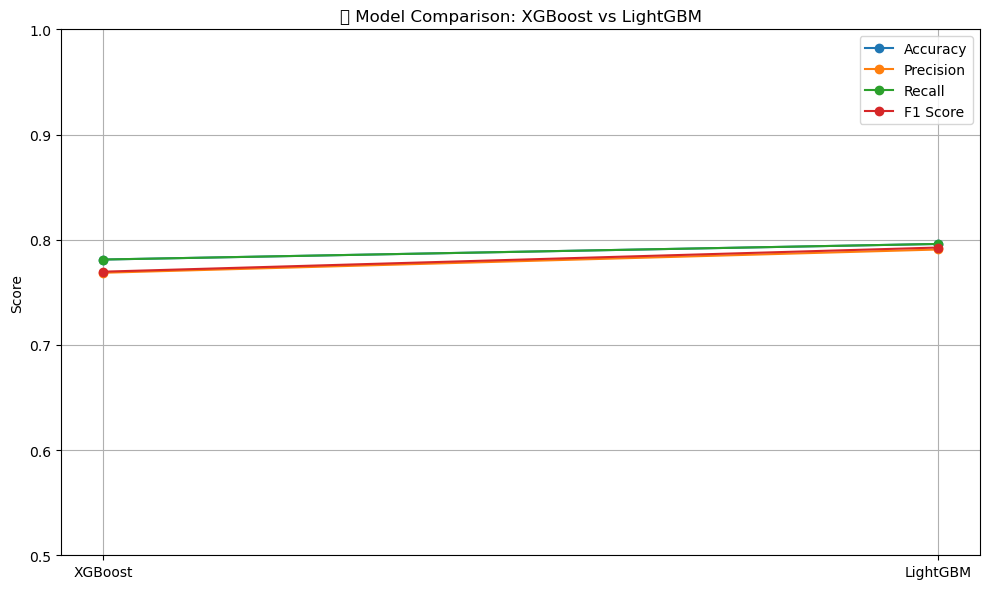

In [70]:
import pandas as pd

df_metrics = pd.DataFrame(metrics)

plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(df_metrics['Model'], df_metrics[metric], label=metric, marker='o')

plt.title("📊 Model Comparison: XGBoost vs LightGBM")
plt.ylabel("Score")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import lightgbm as lgb

# Vectorize text
Count_vec = CountVectorizer(max_features=10000)
X = Count_vec.fit_transform(df['text'])

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.3, random_state=42)


In [72]:
# Base estimators
base_models = [
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('lr', LogisticRegression(max_iter=1000)),
    ('lgbm', lgb.LGBMClassifier())
]


In [73]:
# Meta learner (final model)
meta_model = LogisticRegression()

# Stacking ensemble
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacked_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 10222, number of used features: 717
[LightGBM] [Info] Start training from score -0.474042
[LightGBM] [Info] Start training from score -1.533361
[LightGBM] [Info] Start training from score -1.821950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 8177, number of used features: 606
[LightGBM] [Info] Start training from score -0.474048
[LightGBM] [Info] Start training from score -1.533175
[LightGBM] [Info] Start

StackingClassifier(cv=5,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              intera...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('lr', LogisticRegression(max_iter=1000)),
                               ('lgbm', LGBMClassifier())],
                   final_estimator=LogisticRegression())

In [74]:
y_pred = stacked_model.predict(X_test)

print("✅ Stacked Model Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Stacked Model Accuracy: 0.8023733455043359
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      2796
           1       0.62      0.58      0.60       885
           2       0.77      0.67      0.72       701

    accuracy                           0.80      4382
   macro avg       0.75      0.72      0.73      4382
weighted avg       0.80      0.80      0.80      4382

🧮 Confusion Matrix:
 [[2527  209   60]
 [ 289  516   80]
 [ 121  107  473]]


In [75]:
# 📦 Import libraries
import numpy as np
import pandas as pd
import os
import joblib
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ Install LightGBM if missing
try:
    import lightgbm as lgb
except ImportError:
    !pip install lightgbm

# 📁 Create directory
def setup_model_dir(directory='saved_models'):
    if not os.path.exists(directory):
        os.makedirs(directory)
    return directory

model_dir = setup_model_dir()

# 🔡 Text preprocessing
Count_vec = CountVectorizer(max_features=10000)
X = Count_vec.fit_transform(df['text'])
y = df['airline_sentiment']

# 🎯 Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 📊 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y_encoded, test_size=0.3, random_state=42)

# 🔁 Base learners
base_models = [
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('lgbm', lgb.LGBMClassifier()),
    ('lr', LogisticRegression(max_iter=1000))
]

# 🔮 Meta learner
meta_model = LogisticRegression()

# 🧱 Build stacked model
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacked_model.fit(X_train, y_train)

# 💾 Save model
joblib.dump(stacked_model, os.path.join(model_dir, 'stacked_model.pkl'))

# 📈 Evaluate
y_pred = stacked_model.predict(X_test)
print("✅ Stacked Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1895
[LightGBM] [Info] Number of data points in the train set: 10222, number of used features: 717
[LightGBM] [Info] Start training from score -0.474042
[LightGBM] [Info] Start training from score -1.533361
[LightGBM] [Info] Start training from score -1.821950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 8177, number of used features: 606
[LightGBM] [Info] Start training from score -0.474048
[LightGBM] [Info] Start training from score -1.533175
[LightGBM] [Info] Start

In [76]:
# 📦 Required imports
import os, joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 🔧 Setup model directory
def setup_model_dir(dir='saved_models'):
    if not os.path.exists(dir): os.makedirs(dir)
    return dir

model_dir = setup_model_dir()

# 📚 Text preprocessing
tfidf = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf.fit_transform(df['text']).toarray()

le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# 🎯 Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
joblib.dump(lr_model, f"{model_dir}/logistic_regression.pkl")

# 🎯 Model 2: XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
joblib.dump(xgb_model, f"{model_dir}/xgboost.pkl")

# 🎯 Model 3: LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
joblib.dump(lgb_model, f"{model_dir}/lightgbm.pkl")

# 🎯 Model 4: Stacked Ensemble
base_models = [('lr', lr_model), ('xgb', xgb_model), ('lgbm', lgb_model)]
meta_model = LogisticRegression()
stacked = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacked.fit(X_train, y_train)
joblib.dump(stacked, f"{model_dir}/stacked_model.pkl")

# 🧠 Model 5: BiLSTM + Dense
tokenizer = Tokenizer(num_words=20000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
seqs = tokenizer.texts_to_sequences(df['text'])
X_seq = pad_sequences(seqs, maxlen=100, padding='post')
y_seq = le.transform(df['airline_sentiment'])

X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)

def build_bilstm_model():
    model = Sequential([
        Embedding(20000, 128, input_length=100),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(32)),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(len(le.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

dl_model = build_bilstm_model()
dl_model.fit(X_seq_train, y_seq_train, epochs=10, batch_size=64, validation_split=0.2)
dl_model.save(f"{model_dir}/bilstm_model.h5")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23424
[LightGBM] [Info] Number of data points in the train set: 10222, number of used features: 717
[LightGBM] [Info] Start training from score -0.474042
[LightGBM] [Info] Start training from score -1.533361
[LightGBM] [Info] Start training from score -1.821950
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23424
[LightGBM] [Info] Number of data points in the train set: 10222, number of used features: 717
[LightGBM] [Info] Start training from score -0.474042
[LightGBM] [Info] Start training from score -1.533361
[LightGBM] [Info] Start training from score -1.821950
[LightGBM] [Info] Auto-choosin

In [77]:
def evaluate(model, X, y_true, name):
    y_pred = model.predict(X)
    if hasattr(y_pred[0], '__len__'):  # Handle DL model probabilities
        y_pred = y_pred.argmax(axis=1)
    print(f"\n📢 Evaluation for {name}")
    print("✅ Accuracy:", accuracy_score(y_true, y_pred))
    print("📋 Classification Report:\n", classification_report(y_true, y_pred))

# Load and test all models
evaluate(joblib.load(f"{model_dir}/logistic_regression.pkl"), X_test, y_test, "Logistic Regression")
evaluate(joblib.load(f"{model_dir}/xgboost.pkl"), X_test, y_test, "XGBoost")
evaluate(joblib.load(f"{model_dir}/lightgbm.pkl"), X_test, y_test, "LightGBM")
evaluate(joblib.load(f"{model_dir}/stacked_model.pkl"), X_test, y_test, "Stacked Ensemble")

dl_loaded = tf.keras.models.load_model(f"{model_dir}/bilstm_model.h5")
evaluate(dl_loaded, X_seq_test, y_seq_test, "BiLSTM Deep Model")



📢 Evaluation for Logistic Regression
✅ Accuracy: 0.7966681880419899
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      2796
           1       0.66      0.49      0.56       885
           2       0.82      0.60      0.69       701

    accuracy                           0.80      4382
   macro avg       0.77      0.68      0.71      4382
weighted avg       0.79      0.80      0.78      4382


📢 Evaluation for XGBoost
✅ Accuracy: 0.7777270652670014
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2796
           1       0.61      0.46      0.53       885
           2       0.75      0.61      0.67       701

    accuracy                           0.78      4382
   macro avg       0.73      0.66      0.69      4382
weighted avg       0.77      0.78      0.77      4382


📢 Evaluation for LightGBM
✅ Accuracy: 0.7841168416248289
📋 

137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step

📢 Evaluation for BiLSTM Deep Model
✅ Accuracy: 0.7186216339570972
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      2796
           1       0.45      0.68      0.54       885
           2       0.65      0.61      0.63       701

    accuracy                           0.72      4382
   macro avg       0.66      0.68      0.66      4382
weighted avg       0.76      0.72      0.73      4382



In [ ]:
# ------------------------------------------
# 0. Install & Imports
# ------------------------------------------
!pip install --quiet optuna

import os, joblib, optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import xgboost as xgb
import lightgbm as lgb

# ------------------------------------------
# 1. Prepare Data
# ------------------------------------------
# assume `df` with 'text' and 'airline_sentiment' is in scope
tfidf = TfidfVectorizer(max_features=10_000, ngram_range=(1,2))
X = tfidf.fit_transform(df['text']).toarray()

le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ensure save directory
MODEL_DIR = "saved_models"
os.makedirs(MODEL_DIR, exist_ok=True)

# ------------------------------------------
# 2. Bayesian Tuning Functions
# ------------------------------------------
def bayes_opt_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth':    trial.suggest_int('max_depth', 3, 10),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'subsample':    trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma':        trial.suggest_loguniform('gamma', 1e-8, 1.0)
    }
    clf = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    return cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_weighted').mean()

def bayes_opt_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'num_leaves':   trial.suggest_int('num_leaves', 20, 150),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'boosting_type':trial.suggest_categorical('boosting_type', ['gbdt','dart']),
        'subsample':    trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    }
    clf = lgb.LGBMClassifier(**params, random_state=42)
    return cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_weighted').mean()

def bayes_opt_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth':    trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt','log2', 0.2, 0.5, None])
    }
    clf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    return cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_weighted').mean()

# ------------------------------------------
# 3. Run Optuna Studies
# ------------------------------------------
for name, fn in [('xgb', bayes_opt_xgb),
                 ('lgb', bayes_opt_lgb),
                 ('rf',  bayes_opt_rf)]:
    study = optuna.create_study(direction='maximize')
    study.optimize(fn, n_trials=30, show_progress_bar=True)
    print(f">>> {name} best F1:", study.best_value)
    joblib.dump(study.best_params, f"{MODEL_DIR}/{name}_best_params.pkl")

# ------------------------------------------
# 4. Train Tuned Models
# ------------------------------------------
# load best params
params_xgb = joblib.load(f"{MODEL_DIR}/xgb_best_params.pkl")
best_xgb = xgb.XGBClassifier(**params_xgb, use_label_encoder=False,
                             eval_metric='mlogloss', random_state=42)
best_xgb.fit(X_train, y_train)
joblib.dump(best_xgb, f"{MODEL_DIR}/best_xgb.pkl")

params_lgb = joblib.load(f"{MODEL_DIR}/lgb_best_params.pkl")
best_lgb = lgb.LGBMClassifier(**params_lgb, random_state=42)
best_lgb.fit(X_train, y_train)
joblib.dump(best_lgb, f"{MODEL_DIR}/best_lgb.pkl")

params_rf = joblib.load(f"{MODEL_DIR}/rf_best_params.pkl")
best_rf = RandomForestClassifier(**params_rf, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)
joblib.dump(best_rf, f"{MODEL_DIR}/best_rf.pkl")

# ------------------------------------------
# 5. Build Stacking Ensemble
# ------------------------------------------
stack = StackingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('lgb', best_lgb),
        ('rf',  best_rf)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5, n_jobs=-1
)
stack.fit(X_train, y_train)
joblib.dump(stack, f"{MODEL_DIR}/stacked.pkl")

# ------------------------------------------
# 6. Evaluate & Compare
# ------------------------------------------
models = {
    'XGBoost': best_xgb,
    'LightGBM': best_lgb,
    'RandomForest': best_rf,
    'Stacked': stack
}

results = []
for name, m in models.items():
    y_pred = m.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1_weighted': f1_score(y_test, y_pred, average='weighted')
    })

df_res = pd.DataFrame(results).set_index('Model')
print(df_res)

# plot
df_res.plot.bar(figsize=(8,5), ylim=(0,1), title="Tuned Models vs Stacked Ensemble")
plt.ylabel("Score")
plt.show()

# detailed report for best
best_name = df_res['F1_weighted'].idxmax()
print(f"\n>>> Detailed report for: {best_name}")
print(classification_report(y_test, models[best_name].predict(X_test),
                            target_names=le.classes_))


[I 2025-07-14 19:49:52,484] A new study created in memory with name: no-name-9702f7d6-2744-4994-964d-697dc107fe2d


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-07-14 20:05:49,430] Trial 0 finished with value: 0.6731984844594118 and parameters: {'n_estimators': 377, 'max_depth': 8, 'learning_rate': 0.00314651009128286, 'subsample': 0.8490071598024933, 'colsample_bytree': 0.9727686452367093, 'gamma': 0.00019136265952808266}. Best is trial 0 with value: 0.6731984844594118.
[I 2025-07-14 20:09:44,853] Trial 1 finished with value: 0.6669013681607355 and parameters: {'n_estimators': 186, 'max_depth': 9, 'learning_rate': 0.007729014090890061, 'subsample': 0.8659651478026811, 'colsample_bytree': 0.6024752515777617, 'gamma': 7.742497447362349e-07}. Best is trial 0 with value: 0.6731984844594118.
[I 2025-07-14 20:12:20,386] Trial 2 finished with value: 0.6882197494433738 and parameters: {'n_estimators': 118, 'max_depth': 9, 'learning_rate': 0.02450773736007309, 'subsample': 0.9656079428454147, 'colsample_bytree': 0.6929930636489874, 'gamma': 0.1838619604376765}. Best is trial 2 with value: 0.6882197494433738.
[I 2025-07-14 20:18:19,683] Trial 3